# Visualize quantile and parametric forecasts

In [1]:
# imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import plotly.graph_objects as go
from create_parametric_forecasts import ParametricForecasts

In [2]:
# Specify the forecast to investigate
path_quantile = 'C:\\Users\\fh6281\\PycharmProjects\\GermanBuildingDate\\02_forecast\\storage_quantile_fc\\file_fc_PatchTST_SFH3_2025-07-16_13-47-24_freq15.csv'

# get the corresponding path to the parametric forecast
path_parametric = path_quantile.replace('storage_quantile_fc', 'storage_param_fc').replace('file_fc_', 'file_fc_parametric_')

In [3]:
# Define visualization functions
def plot_specific_day(df_fc, df_gt, time, title=None, single_index=False):

    if not single_index:
        fc_time = df_fc.loc[time]
    else:
        fc_time = df_fc
    #gt_time = df_gt.loc[time]

    fig = go.Figure()
    for col in fc_time.columns:
        fig.add_trace(go.Scatter(x=fc_time.index, y=fc_time[col], mode='lines', name=col))
    fig.add_trace(go.Scatter(x=fc_time.index, y=df_gt.loc[fc_time.index, 'P_TOT'], mode='lines', name='Ground Truth', line=dict(color='black', width=4)))
    fig.update_layout(title=title if title else f'Forecast for {time}', xaxis_title='Time', yaxis_title='Value')
    fig.show()

## Quantile Forecasts

In [4]:
# Load the quantile forecasts
fc_quantile = pd.read_csv(path_quantile, index_col=[2, 1], parse_dates=True)


gt = fc_quantile['P_TOT'].reset_index()
gt.index = gt['timestamp']
gt = gt.drop(columns=['timestamp', 'time_fc_created'])
gt = gt[~gt.index.duplicated(keep='first')]

# Drop the building and P-TOT columns from the quantile forecast
fc_quantile = fc_quantile.drop(columns=['building', 'P_TOT'])

In [5]:
time_to_plot = '2020-05-13 08:00:00'
plot_specific_day(fc_quantile, gt, time_to_plot, title=f'Unsorted Quantile Forecast for {time_to_plot}')

In [6]:
pf = ParametricForecasts()
pf.load_quantile_forecasts(path_quantile)

fc_quantile_sorted = pf.sort_quantiles()
plot_specific_day(fc_quantile_sorted, gt, time_to_plot, title=f'Sorted Quantile Forecast for {time_to_plot}')

Sorting quantiles in ascending order…


In [7]:
fc_quantile_smoothed_over_time = pf.smooth_quantiles_over_time(fc_quantile_sorted, window_size=5)
plot_specific_day(fc_quantile_smoothed_over_time, gt, time_to_plot, title=f'Smoothed Quantile Forecast for {time_to_plot}')

Smoothing each quantile over time with a rolling mean…


In [8]:
fc_quantile_smoothed = pf.smooth_quantiles_at_each_time(fc_quantile_sorted, window_size=5)
plot_specific_day(fc_quantile_smoothed, gt, time_to_plot, title=f'Smoothed Quantile Forecast at Each Time for {time_to_plot}')

Smoothing all quantiles at each time with a rolling mean…


## Parametric Forecasts

In [9]:
pf = ParametricForecasts()
fc_param = pf.load_parametric_forecasts(path_parametric)
pf.compute_expected_values(fc_param, name='sum2gaussian')

w1          mu1  \
time_fc_created           timestamp                                          
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00  0.977438 -1447.802011   
                          2020-05-13 06:30:00+00:00  0.421790 -1892.432330   
                          2020-05-13 06:45:00+00:00  0.628727 -2016.347908   
                          2020-05-13 07:00:00+00:00  0.452051 -2488.932510   
                          2020-05-13 07:15:00+00:00  0.487155 -2535.414973   
...                                                       ...          ...   
2020-05-13 06:45:00+00:00 2020-05-14 05:30:00+00:00  0.507420 -1251.174538   
                          2020-05-14 05:45:00+00:00  0.504246 -1419.378265   
                          2020-05-14 06:00:00+00:00  0.533832 -1672.889897   
                          2020-05-14 06:15:00+00:00  0.506507 -1923.681469   
                          2020-05-14 06:30:00+00:00  0.608090 -1832.511180   

                                                            std1        w2  \
time_fc_created           timestamp                                          
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00  1615.415259  0.022562   
                          2020-05-13 06:30:00+00:00   594.428184  0.578210   
                          2020-05-13 06:45:00+00:00   528.521881  0.371273   
                          2020-05-13 07:00:00+00:00   614.093255  0.547949   
                          2020-05-13 07:15:00+00:00   591.649503  0.512845   
...                                                          ...       ...   
2020-05-13 06:45:00+00:00 2020-05-14 05:30:00+00:00   713.881991  0.492580   
                          2020-05-14 05:45:00+00:00   653.140405  0.495754   
                          2020-05-14 06:00:00+00:00   664.237751  0.466168   
                          2020-05-14 06:15:00+00:00   642.036834  0.493493   
                          2020-05-14 06:30:00+00:00   808.462462  0.391910   

                                                             mu2         std2  \
time_fc_created           timestamp                                             
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00  9440.699431  1804.178269   
                          2020-05-13 06:30:00+00:00  -903.770641   774.227828   
                          2020-05-13 06:45:00+00:00  -867.983009   501.641421   
                          2020-05-13 07:00:00+00:00 -1209.403570   570.186332   
                          2020-05-13 07:15:00+00:00 -1149.970353   504.473910   
...                                                          ...          ...   
2020-05-13 06:45:00+00:00 2020-05-14 05:30:00+00:00   172.888613   884.746778   
                          2020-05-14 05:45:00+00:00   199.057964   738.358842   
                          2020-05-14 06:00:00+00:00   -31.113205   633.951524   
                          2020-05-14 06:15:00+00:00  -210.161683   682.480946   
                          2020-05-14 06:30:00+00:00   -72.229035   585.854148   

                                                     expected_value  
time_fc_created           timestamp                                  
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00    -1202.130816  
                          2020-05-13 06:30:00+00:00    -1320.778518  
                          2020-05-13 06:45:00+00:00    -1589.990714  
                          2020-05-13 07:00:00+00:00    -1787.816125  
                          2020-05-13 07:15:00+00:00    -1824.896735  
...                                                             ...  
2020-05-13 06:45:00+00:00 2020-05-14 05:30:00+00:00     -549.709745  
                          2020-05-14 05:45:00+00:00     -617.032709  
                          2020-05-14 06:00:00+00:00     -907.546925  
                          2020-05-14 06:15:00+00:00    -1078.071263  
                          2020-05-14 06:30:00+00:00    -1142.638774  

[288 rows x 7 columns]

In [10]:
timestamp = pd.Timestamp('2020-05-13 06:15:00', tz='UTC')
#fc_param.loc[timestamp, 'expected_value'].plot()
plot_specific_day(fc_param.loc[:, ['expected_value']], gt, timestamp, title=f'Expected Value for {timestamp}')

In [11]:
# Create a dataframe based on the expected values. Only take the first entry for each time_fc_creation
fc_param_expected_next_step = fc_param.loc[:, ['expected_value']].reset_index()
fc_param_expected_next_step = fc_param_expected_next_step[~fc_param_expected_next_step['time_fc_created'].duplicated(keep='first')]
fc_param_expected_next_step.set_index('timestamp', inplace=True)
fc_param_expected_next_step
plot_specific_day(fc_param_expected_next_step.loc[:, ['expected_value']], gt, timestamp, title=f'Only Upcoming FC vs Ground Truth', single_index=True)

In [12]:
# TODO: Calculate expected values based on the parametric forecast
# TODO: Compare expected values with the ground truth
# TODO: Plot only the expected value of the next timestamp


# TODO: Plot single hour PDFS
# TODO: Compare single hour fitted PDFs and CDFs with the quantile forecasts

# TODO: Calculate CRPS score for the quantile forecasts
# TODO: Visualize PIT-Plots for the quantile forecasts

In [13]:
import math
from typing import Iterable, Tuple, Sequence, Optional

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm


def plot_cdf_comparison(
    fc_quantile: pd.DataFrame,
    fc_param: pd.DataFrame,
    gt: pd.Series,
    issuance_time: pd.Timestamp,
    target_range: Tuple[pd.Timestamp, pd.Timestamp],
    *,
    max_panels: int = 12,
    quantile_regex: str = r"quantile_(\d+(?:\.\d+)?)",  # columns like q0.05, q0.5 …
    figsize_per_panel: Tuple[float, float] = (4.0, 3.0),
):
    """
    Compare the CDF of a quantile forecast and a parametric (two-Gaussian) forecast.

    Parameters
    ----------
    fc_quantile, fc_param
        Multi-index DataFrames. Level-0 index = forecast creation time,
        level-1 index = target timestamp.  `fc_quantile` columns are quantiles,
        e.g. 'q0.05', 'q0.5', …  `fc_param` columns are the 6 mixture parameters
        (w1, mu1, sigma1, w2, mu2, sigma2).
    gt
        Pandas Series indexed by timestamp with the realised value.
    issuance_time
        Timestamp of the issuance to visualise (must exist in level-0 index).
    target_range
        (start_ts, end_ts) limiting the targets to plot.
    max_panels
        If more targets than `max_panels`, plot a regular subsample.
    quantile_regex
        Regex for extracting the numerical α from column names.
    param_cols
        Ordered names of the 6 mixture columns.
    figsize_per_panel
        Size of each subplot in inches.
    """
    # --------------------
    # 1. Slice the inputs
    # --------------------
    q_slice = (
        fc_quantile.loc[issuance_time]
        .sort_index()
        .loc[target_range[0] : target_range[1]]
    )
    p_slice = (
        fc_param.loc[issuance_time]
        .sort_index()
        .loc[target_range[0] : target_range[1]]
    )
    gt_slice = gt.loc[target_range[0] : target_range[1]]

    if q_slice.empty:
        raise ValueError("No quantile data after slicing – check your indices.")
    if p_slice.empty:
        raise ValueError("No parametric data after slicing – check your indices.")

    # Limit number of sub-plots
    targets = q_slice.index
    if len(targets) > max_panels:
        step = math.ceil(len(targets) / max_panels)
        targets = targets[::step]

    # Extract α’s from quantile columns (e.g. 'q0.15' -> 0.15)
    quantile_levels = (
        pd.Series(q_slice.columns)
        .str.extract(quantile_regex, expand=False)
        .astype(float)
        .values
    )

    # --------------------
    # 2. Build figure
    # --------------------
    n_panels = len(targets)
    n_cols = min(3, n_panels)
    n_rows = math.ceil(n_panels / n_cols)
    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(figsize_per_panel[0] * n_cols, figsize_per_panel[1] * n_rows),
        squeeze=False,
    )

    for ax, t in zip(axes.flat, targets):
        # Quantile forecast → empirical CDF (piece-wise linear)
        q_vals = q_slice.loc[t].values.astype(float)
        # Ensure sorted order just in case
        x_q = np.sort(q_vals)
        alpha = quantile_levels
        # Add 0 and 1 boundaries for proper CDF plot
        x_q = np.concatenate(([x_q[0]], x_q, [x_q[-1]]))
        alpha = np.concatenate(([0.0], alpha, [1.0]))
        ax.plot(x_q, alpha, drawstyle="steps-post", label="quantile-CDF")
        

        w1 = p_slice.loc[t, "w1"]
        mu1 = p_slice.loc[t, "mu1"]
        sigma1 = p_slice.loc[t, "std1"]
        w2 = p_slice.loc[t, "w2"]
        mu2 = p_slice.loc[t, "mu2"]
        sigma2 = p_slice.loc[t, "std2"]
        x_min = min(np.min(x_q), mu1 - 4 * sigma1, mu2 - 4 * sigma2)
        x_max = max(np.max(x_q), mu1 + 4 * sigma1, mu2 + 4 * sigma2)
        x_grid = np.linspace(x_min, x_max, 400)
        cdf_mix = w1 * norm.cdf(x_grid, mu1, sigma1) + w2 * norm.cdf(
            x_grid, mu2, sigma2
        )
        ax.plot(x_grid, cdf_mix, label="parametric-CDF")

        # Plot a vertical line for the ground truth value
        if t in gt_slice.index:
            ax.axvline(
                gt_slice.loc[t].values[0],
                color="k",
                lw=1,
                ls="--",
                label="ground-truth" if "ground-truth" not in ax.get_legend_handles_labels()[1] else None,
            )

        ax.set_title(f"{t:%Y-%m-%d %H:%M}")
        ax.set_xlabel("Value")
        ax.set_ylabel("F(x)")
        ax.set_ylim(0, 1)
        ax.grid(True)

    # Hide any empty axes
    for ax in axes.flat[n_panels:]:
        ax.set_visible(False)

    # Single legend
    handles, labels = axes[0, 0].get_legend_handles_labels()
    fig.legend(handles, labels, loc="upper center", ncol=3)
    fig.tight_layout(rect=[0, 0, 1, 0.96])
    return fig


C:\Users\fh6281\AppData\Local\Temp\ipykernel_12968\3587277009.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



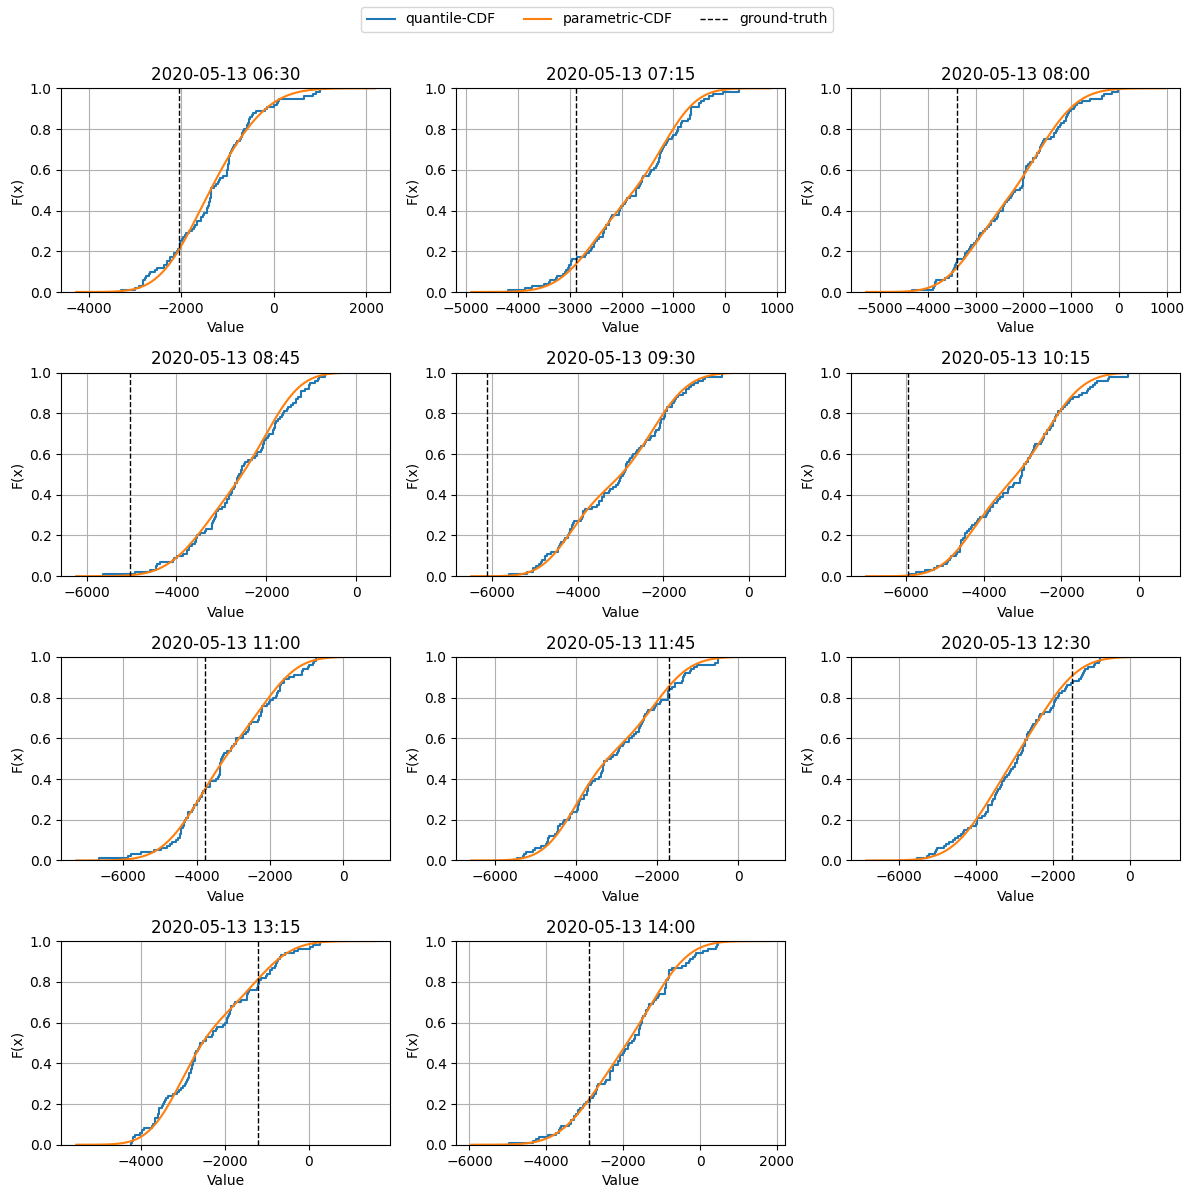

In [14]:
issuance = pd.Timestamp("2020-05-13 06:15", tz="utc")
t_start = issuance + pd.Timedelta(minutes=15)      # first target
t_end   = issuance + pd.Timedelta(hours=8)        # last target

fig = plot_cdf_comparison(
    fc_quantile=fc_quantile,
    fc_param=fc_param,
    gt=gt,
    issuance_time=issuance,
    target_range=(t_start, t_end)
)
fig.show()


## Playground

In [65]:
from pathlib import Path
import properscoring as ps

In [ ]:
def evaluate(fpath: Path) -> pd.DataFrame:
    """
    CRPS via properscoring.crps_quadrature.

    Input CSV layout:
        col0 = issuance_time, col1 = target_time,
        subsequent columns = q5, q50, q95 … (percent or 0-1 format).
    """
    df = pd.read_csv(fpath)
    df = df.drop(columns=['building', 'P_TOT'], errors='ignore')  # Drop if exists
    df = df.set_index(['time_fc_created', 'timestamp'])  # Set multi-index

    #return df
    q_cols = df.columns
    # Extract α levels from column names
    alpha = (
        pd.Series(q_cols)
        .str.extract(r"(\d+(?:\.\d+)?)", expand=False)
        .astype(float)
        .values
    )

    #print("alpha:", alpha)


    #order = np.argsort(alpha)
    #alpha = alpha[order]
    #q_vals = df.iloc[:, order].values            # (N, n_q)

    # sort the df in ascending order
    q_vals = np.sort(df.values, axis=1)
    #return df_sorted

    print("alpha:", alpha)

    # Add 0/1 boundaries
    alpha_ext = np.concatenate([[0.0], alpha, [1.0]])
    q_ext = np.concatenate(
        [q_vals[:, [0]], q_vals, q_vals[:, [-1]]], axis=1
    )


    # create a function that return the cumulative density function (CDF) at value x. For that make linear interpolation between the quantiles
    interp

    #return q_ext

    # Align ground truth TODO: CHeck this
    #y = align_gt(df.index.get_level_values(1)).values

    crps = np.array(
        [
            ps.crps_quadrature(y_obs=float(y[i]), cdf_vals=alpha_ext, x_grid=q_ext[i])
            for i in range(len(y))
        ]
    )
    return pd.DataFrame({"crps": crps}, index=df.index)

In [ ]:
@dataclass
class _FCModel:
    name: str
    path: Path
    cache_file: Optional[Path] = None

class CrpsEvaluator:
    """ Evaluates CRPS metric for a single ground truth file. """

    def __init__(self, gt_path: Path, cache_dir: Path):
        self.gt = _load_gt(gt_path)
        self.cache_dir = Path(cache_dir)
        self.cache_dir.mkdir(parents=True, exist_ok=True)
        self._models: list[_FCModel] = []


    def add_model(self, *, name: str, path: Path):
        self._models.append(_FCModel(name=name, path=path))

    def evaluate(self):
        # go through models and evaluate them

        # check for each model if results already exist

        # if not, evaluate via ensemble and save results

        for m in self._models:
            m.cache_file = self.cache_dir / f''







    def print_leaderboard(self):
        pass


    @staticmethod
    def _load_gt(path: Path) -> pd.Series:
        """
        Load a CSV and keep index and P_TOT column as Series.
        """
        df = pd.read_csv(path, parse_dates=[0], index_col=0)
        # only keep P_TOT column
        df = df[["P_TOT"]]
        ser = df.iloc[:, 0].sort_index()
        ser.name = "gt"
        return ser

In [213]:
fpath = "storage_quantile_fc/file_fc_PatchTST_SFH3_2025-07-16_13-47-24_freq15.csv"

df = pd.read_csv(fpath)
df = df.drop(columns=['building', 'P_TOT'], errors='ignore')  # Drop if exists
df = df.set_index(['time_fc_created', 'timestamp'])  # Set multi-index

# rename the columns to 0.05, 0.5, 0.95, etc.
df.columns = df.columns.str.replace(r"quantile_(\d+(?:\.\d+)?)", r"\1", regex=True)
# make the columns type float
df.columns = df.columns.astype(float)

y = np.sort(df.values, axis=1)  # sort the values in each row
# add new y values to the dataframe
df = pd.DataFrame(y, index=df.index, columns=df.columns)



# check that the values in a row are sorted
if not all(df.apply(lambda x: np.all(np.diff(x) >= 0), axis=1)):
    raise ValueError("Quantile values in some rows are not sorted.")

quant_levels = df.columns.values.astype(float)


# iterate through each row and create a function that returns the CDF at value x. Input is a quantile value and ouput is the CDF value
def cdf_func(x, row, q_levels=quant_levels):
    """
    Create a CDF function for a given row of quantile values.
    """
    # Ensure the row is sorted
    sorted_row = np.sort(row)
    # Add 0 and 1 boundaries
    x_ext = np.concatenate(([sorted_row[0]], sorted_row, [sorted_row[-1]]))
    alpha_ext = np.concatenate(([0.0], q_levels, [1.0]))
    return np.interp(x, x_ext, alpha_ext)


# create a dataframe with the same index but with a single column 'cdf' that contains the CDF function for each row
cdf_df = pd.DataFrame(index=df.index, columns=['cdf'])
for i in range(len(df)):
    cdf_df.at[df.index[i], 'cdf'] = lambda x, row=df.iloc[i]: cdf_func(x, row)

a = cdf_df.iloc[0, 0]  
a(df.iloc[0,0])  # Should return the probability at the first quantile value


# Iterate through each row and call ps.crps_quadrature with the CDF function and the gt value at that row's timestamp
# crps_values = []
# for index, row in cdf_df.iterrows():
#     gt_value = gt.loc[index[1]]  
#     try:
#         crps_val = ps.crps_quadrature(gt_value, row['cdf'], tol=1e-3)
#     except Exception as e:
#         #print(f"Error calculating CRPS for index {index}: {e}")
#         crps_val = np.nan
#     #crps_val = ps.crps_quadrature(gt_value, row['cdf'], tol=1e-1)
#     crps_values.append(crps_val)



def inverse_cdf_func(p, row):

    probs = row.index.values.astype(float)
    quantile_values = row.values

    # Interpolate to find x for given p
    return np.interp(p, probs, quantile_values)

inverse_cdf_df = pd.DataFrame(index=df.index, columns=['inverse_cdf'])
for i in range(len(df)):
    row = df.iloc[i]
    inverse_cdf_df.at[df.index[i], 'inverse_cdf'] = lambda p, row=row: inverse_cdf_func(p, row)

In [215]:
inverse_cdf_df.iloc[0,0](0.03)

np.float64(-5029.9)

In [255]:
# use crps_ensemble to calculate the CRPS for the quantile forecast
crps_values = []
sample_size = 500  # Number of samples to draw
uniform_samples = np.random.uniform(0, 1, sample_size)
for index, row in inverse_cdf_df.iterrows():
    gt_value = float(gt.loc[index[1]].iloc[0])


    inverse_samples = row['inverse_cdf'](uniform_samples)
    crps_val = ps.crps_ensemble(gt_value, inverse_samples)  # TODO: Do I trust this method?
    crps_values.append(float(crps_val))
crps_values = pd.Series(crps_values, index=df.index, name='crps')

In [256]:
crps_values_500samples = crps_values

In [257]:
crps_values_500samples.mean()

np.float64(787.8337362771102)

In [254]:
crps_values_5000samples.mean()

np.float64(791.6942636956612)

In [250]:
crps_values_100samples.mean()

np.float64(786.4894145500233)

In [246]:
crps_values_1000samples.mean()


np.float64(781.8081910973732)

In [234]:
gt.loc[index[1]].iloc[0]

np.float64(-4740.119256626143)

In [224]:
gt_value

array([-3029.9914334])

In [228]:
inverse_samples

array([-1762.20071528, -2277.6178985 , -2025.06969776, -3155.87937977,
       -1731.48959554, -1814.20446554, -2415.98091653, -1345.92785048,
       -1797.48999652, -2870.61420914, -3890.92338063, -2418.91807705,
       -3231.58689054, -2556.69767449,  -963.5994831 , -2344.52994352,
       -5217.991     , -3838.02154405, -1730.65098395, -1132.26428744,
       -1531.28610268, -2422.86087279, -3784.34489226,  -830.42107328,
       -2581.35346244, -2704.63933126,  -107.70497954, -4281.97376033,
       -2732.23259831, -3839.3045132 , -4224.93443315, -1168.5277086 ,
       -2269.70855738, -3582.21424161,  -965.46796719, -3900.44545414,
       -1296.02129054, -1834.54486351, -3586.85205687, -3839.73162023,
       -2224.36827612, -2325.85698847, -3310.52499255, -4293.07542282,
         -97.11069784, -2689.7619018 ,  -823.48277472, -2414.5582392 ,
       -4513.8388782 , -3306.98696327, -3842.89363446, -3324.27745755,
       -4026.09057926, -2872.76483705, -2869.64556065, -1233.43891504,
      

In [216]:
inverse_cdf_df

inverse_cdf
time_fc_created           timestamp                                                           
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00  <function <lambda> at 0x000002BA9D767E20>
                          2020-05-13 06:30:00+00:00  <function <lambda> at 0x000002BA9D767D80>
                          2020-05-13 06:45:00+00:00  <function <lambda> at 0x000002BA9D767CE0>
                          2020-05-13 07:00:00+00:00  <function <lambda> at 0x000002BA9D767C40>
                          2020-05-13 07:15:00+00:00  <function <lambda> at 0x000002BA9D767BA0>
...                                                                                        ...
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00  <function <lambda> at 0x000002BA9D6BFCE0>
                          2020-05-14 12:00:00+00:00  <function <lambda> at 0x000002BA9D6BFD80>
                          2020-05-14 12:15:00+00:00  <function <lambda> at 0x000002BA9D6BFE20>
                          2020-05-14 12:30:00+00:00  <function <lambda> at 0x000002BA9D6BFEC0>
                          2020-05-14 12:45:00+00:00  <function <lambda> at 0x000002BA9D6BFF60>

[2688 rows x 1 columns]

In [183]:
# use ps.crps_ensemble to calculate the CRPS for each row
crps_values = []
# iterate through each row of the dataframe
for index, row in cdf_df.iterrows():
    gt_value = gt.loc[index[1]]  # Get the ground truth value for the timestamp
    
    # sample to approximate the CDF
    sample_size = 1000
    cdf = row['cdf']  # Get the CDF function for the row
    uniform_samples = np.random.uniform(low=0, high=1, size=sample_size)

    # get inverse sampling from the CDF
    

    inverse_sampling = np.interp(uniform_samples, quant_levels, df.to_numpy(dtype=float))

    #crps_values.append(sample)


ValueError: object too deep for desired array

In [182]:
df.to_numpy(dtype=float)

array([[-9732.731   , -5333.4053  , -5029.9     , ...,  2383.6685  ,
         8815.102   , 10281.542   ],
       [-3307.4202  , -2990.7502  , -2905.1948  , ...,   848.20917 ,
          918.28864 ,  1008.09894 ],
       [-4045.387   , -3214.8958  , -2952.4836  , ...,   -39.727417,
           51.53711 ,    52.124268],
       ...,
       [-4892.7476  , -4880.3154  , -4780.09    , ...,  -972.75006 ,
         -576.31494 ,  -547.0276  ],
       [-4801.533   , -4676.9688  , -4479.3467  , ...,  -792.1601  ,
         -560.0472  ,  -514.39355 ],
       [-5217.991   , -5131.7837  , -4529.086   , ...,  -484.38757 ,
         -327.88342 ,   492.67883 ]], shape=(2688, 99))

In [136]:
import numpy as np
import pandas as pd

def crps_from_quantiles(
    y_obs: np.ndarray | pd.Series,
    q_vals: np.ndarray | pd.DataFrame,
    alpha: np.ndarray | list[float],
) -> np.ndarray:
    """
    Closed-form CRPS for quantile forecasts.

    Parameters
    ----------
    y_obs   : shape (N,)          – observations (float)
    q_vals  : shape (N, K) or (K,)– quantile values for each of K levels
    alpha   : shape (K,)          – quantile levels in (0,1), ascending

    Returns
    -------
    crps    : shape (N,)          – CRPS per observation
    """
    y_obs  = np.asarray(y_obs,  dtype=float).reshape(-1, 1)   # (N,1)
    q_vals = np.asarray(q_vals, dtype=float)
    if q_vals.ndim == 1:                                      # (K,) -> (1,K)
        q_vals = q_vals.reshape(1, -1)
    if q_vals.shape[1] != len(alpha):
        raise ValueError("q_vals second dim must match len(alpha)")

    alpha = np.asarray(alpha, dtype=float)
    if not np.all(np.diff(alpha) > 0):
        raise ValueError("alpha must be strictly increasing")

    # extend with 0 and 1 boundaries and repeated end-quantiles
    alpha_ext = np.concatenate(([0.0], alpha, [1.0]))         # (K+2,)
    q_ext     = np.concatenate(
        [q_vals[:, [0]], q_vals, q_vals[:, [-1]]], axis=1
    )                                                         # (N, K+2)

    # differences Δα = α_j − α_{j−1}
    dalpha   = np.diff(alpha_ext)                             # (K+1,)
    # |y − q_j| term, broadcast (N, K+1)
    term_obs = np.abs(y_obs - q_ext[:, 1:])                   # exclude q_0
    # |q_j − q_{j−1}| term
    term_int = np.abs(np.diff(q_ext, axis=1))                 # (N, K+1)

    crps = np.sum(dalpha * term_obs, axis=1) \
         - 0.5 * np.sum(dalpha * term_int, axis=1)

    return crps


In [ ]:
# 99-quantile DataFrame: rows = (issuance, target), cols = '0.01' … '0.99'
alpha = df.columns.astype(float).values          # (K,)
q     = df.values                                # (N, K)

# ground truth Series aligned to same (issuance, target) MultiIndex
gt_multiindex = df.copy()
gt_multiindex = gt_multiindex.drop(columns=gt_multiindex.columns)
gt_multiindex["P_TOT"] = np.nan
# fill the column by matching the second level of the MultiIndex to gt.index
for idx in gt_multiindex.index:
    target_time = idx[1]
    if target_time in gt.index:
        gt_multiindex.at[idx, "P_TOT"] = gt.loc[target_time, "P_TOT"]


crps = crps_from_quantiles(gt_multiindex, q, alpha)          # (N,)

df_crps = pd.DataFrame({"crps": crps}, index=df.index)
print("mean CRPS:", df_crps.crps.mean())


mean CRPS: 1851.7901386731853


In [175]:
df_crps

crps
time_fc_created           timestamp                             
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00  1413.544733
                          2020-05-13 06:30:00+00:00   943.228024
                          2020-05-13 06:45:00+00:00   960.376439
                          2020-05-13 07:00:00+00:00  1198.866975
                          2020-05-13 07:15:00+00:00  1206.213710
...                                                          ...
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00  2458.113284
                          2020-05-14 12:00:00+00:00   944.732033
                          2020-05-14 12:15:00+00:00  2465.558270
                          2020-05-14 12:30:00+00:00  1281.998773
                          2020-05-14 12:45:00+00:00  1009.583313

[2688 rows x 1 columns]

In [162]:
# create a dataframe with the same multiindex and the gt values
gt_multiindex = df.copy()
# drop all columns
gt_multiindex = gt_multiindex.drop(columns=gt_multiindex.columns)
# add a column for ground truth values
gt_multiindex["P_TOT"] = np.nan

# fill the column by matching the second level of the MultiIndex to gt.index
for idx in gt_multiindex.index:
    target_time = idx[1]
    if target_time in gt.index:
        gt_multiindex.at[idx, "P_TOT"] = gt.loc[target_time, "P_TOT"]

gt_multiindex.iloc[0,0]


np.float64(-1658.7382485386056)

In [160]:
gt_multiindex.iloc[1,0]


np.float64(-2056.013585886462)

In [171]:
gt_multiindex

P_TOT
time_fc_created           timestamp                             
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00 -1658.738249
                          2020-05-13 06:30:00+00:00 -2056.013586
                          2020-05-13 06:45:00+00:00 -2435.954031
                          2020-05-13 07:00:00+00:00 -2834.008850
                          2020-05-13 07:15:00+00:00 -2879.560260
...                                                          ...
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00 -5426.866425
                          2020-05-14 12:00:00+00:00 -3229.285652
                          2020-05-14 12:15:00+00:00 -5337.210138
                          2020-05-14 12:30:00+00:00 -3702.683866
                          2020-05-14 12:45:00+00:00 -3029.991433

[2688 rows x 1 columns]

In [ ]:


# print all P_TOT values of the dataframne with the timestamp index 08:00:00
print(gt_multiindex.loc[(slice(None), '2020-05-13 08:00:00+00:00'), 'P_TOT'].values)


[-3390.66517223 -3390.66517223 -3390.66517223 -3390.66517223
 -3390.66517223 -3390.66517223 -3390.66517223 -3390.66517223]


In [152]:
gt.iloc[0]

P_TOT   -1658.738249
Name: 2020-05-13 06:15:00+00:00, dtype: float64

In [143]:
y

array([[nan],
       [nan],
       [nan],
       ...,
       [nan],
       [nan],
       [nan]], shape=(2688, 1))

In [135]:
crps_values

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [124]:
cdf_df

cdf
time_fc_created           timestamp                                                           
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00  <function <lambda> at 0x000002BA92C3FEC0>
                          2020-05-13 06:30:00+00:00  <function <lambda> at 0x000002BA92C3FE20>
                          2020-05-13 06:45:00+00:00  <function <lambda> at 0x000002BA92C3FD80>
                          2020-05-13 07:00:00+00:00  <function <lambda> at 0x000002BA92C3FCE0>
                          2020-05-13 07:15:00+00:00  <function <lambda> at 0x000002BA92C3FC40>
...                                                                                        ...
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00  <function <lambda> at 0x000002BA921A7420>
                          2020-05-14 12:00:00+00:00  <function <lambda> at 0x000002BA921A74C0>
                          2020-05-14 12:15:00+00:00  <function <lambda> at 0x000002BA921A7560>
                          2020-05-14 12:30:00+00:00  <function <lambda> at 0x000002BA921A7600>
                          2020-05-14 12:45:00+00:00  <function <lambda> at 0x000002BA921A76A0>

[2688 rows x 1 columns]

In [123]:
a(-5333)

np.float64(0.02001335396778904)

In [109]:
df.iloc[0,:]

0.01    -9732.7310
0.02    -5333.4053
0.03    -5029.9000
0.04    -4688.4194
0.05    -4239.0703
           ...    
0.95     1920.6199
0.96     2085.1409
0.97     2383.6685
0.98     8815.1020
0.99    10281.5420
Name: (2020-05-13 06:15:00+00:00, 2020-05-13 06:15:00+00:00), Length: 99, dtype: float64

In [75]:
def align_gt(target_times: pd.DatetimeIndex) -> pd.Series:
    missing = target_times.difference(gt.index)
    if not missing.empty:
        raise ValueError(
            f"{len(missing)} GT timestamps missing (first 5: {missing[:5]})"
        )
    return gt.reindex(target_times)

In [79]:
evaluate("storage_quantile_fc/file_fc_PatchTST_SFH3_2025-07-16_13-47-24_freq15.csv")

alpha: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99]


array([[-9732.731   , -9732.731   , -5333.4053  , ...,  8815.102   ,
        10281.542   , 10281.542   ],
       [-3307.4202  , -3307.4202  , -2990.7502  , ...,   918.28864 ,
         1008.09894 ,  1008.09894 ],
       [-4045.387   , -4045.387   , -3214.8958  , ...,    51.53711 ,
           52.124268,    52.124268],
       ...,
       [-4892.7476  , -4892.7476  , -4880.3154  , ...,  -576.31494 ,
         -547.0276  ,  -547.0276  ],
       [-4801.533   , -4801.533   , -4676.9688  , ...,  -560.0472  ,
         -514.39355 ,  -514.39355 ],
       [-5217.991   , -5217.991   , -5131.7837  , ...,  -327.88342 ,
          492.67883 ,   492.67883 ]], shape=(2688, 101))

In [60]:
y[2]

array([-4045.387   , -3214.8958  , -2952.4836  , -2892.4263  ,
       -2884.041   , -2883.9521  , -2881.7776  , -2776.873   ,
       -2563.8494  , -2532.2246  , -2531.4832  , -2471.8745  ,
       -2452.7263  , -2357.5417  , -2337.34    , -2327.262   ,
       -2324.3252  , -2303.613   , -2299.786   , -2288.0054  ,
       -2269.101   , -2261.9932  , -2252.331   , -2243.0027  ,
       -2226.9343  , -2160.104   , -2158.5278  , -2122.5293  ,
       -2097.834   , -2091.4348  , -2086.7932  , -2081.1467  ,
       -2070.6243  , -1999.4888  , -1982.5028  , -1977.021   ,
       -1966.9976  , -1921.7449  , -1918.2772  , -1895.5908  ,
       -1843.3589  , -1801.1654  , -1734.803   , -1728.9922  ,
       -1721.1447  , -1666.1671  , -1648.0994  , -1639.4985  ,
       -1616.7446  , -1603.7693  , -1600.5962  , -1569.4307  ,
       -1542.6094  , -1526.7402  , -1505.5458  , -1466.3689  ,
       -1450.7156  , -1443.7693  , -1379.6294  , -1356.1676  ,
       -1339.8333  , -1335.7065  , -1295.5189  , -1272.

In [52]:
x

quantile_0.01  \
time_fc_created           timestamp                                  
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00     -5333.4053   
                          2020-05-13 06:30:00+00:00     -1768.7485   
                          2020-05-13 06:45:00+00:00     -2269.1010   
                          2020-05-13 07:00:00+00:00     -2347.1530   
                          2020-05-13 07:15:00+00:00     -3383.9230   
...                                                            ...   
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00     -3868.1677   
                          2020-05-14 12:00:00+00:00     -4524.1770   
                          2020-05-14 12:15:00+00:00     -3737.5684   
                          2020-05-14 12:30:00+00:00     -2704.1426   
                          2020-05-14 12:45:00+00:00     -5217.9910   

                                                     quantile_0.02  \
time_fc_created           timestamp                                  
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00     -9732.7310   
                          2020-05-13 06:30:00+00:00     -2766.3655   
                          2020-05-13 06:45:00+00:00     -2160.1040   
                          2020-05-13 07:00:00+00:00     -3734.8027   
                          2020-05-13 07:15:00+00:00     -3857.6372   
...                                                            ...   
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00     -3574.6490   
                          2020-05-14 12:00:00+00:00     -5114.0854   
                          2020-05-14 12:15:00+00:00     -4765.3490   
                          2020-05-14 12:30:00+00:00     -4159.0480   
                          2020-05-14 12:45:00+00:00     -3240.2460   

                                                     quantile_0.03  \
time_fc_created           timestamp                                  
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00     -5029.9000   
                          2020-05-13 06:30:00+00:00     -2560.3484   
                          2020-05-13 06:45:00+00:00     -2892.4263   
                          2020-05-13 07:00:00+00:00     -2770.1733   
                          2020-05-13 07:15:00+00:00     -2948.1330   
...                                                            ...   
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00     -5230.4346   
                          2020-05-14 12:00:00+00:00     -3879.3900   
                          2020-05-14 12:15:00+00:00     -4270.0938   
                          2020-05-14 12:30:00+00:00     -4042.0999   
                          2020-05-14 12:45:00+00:00     -3787.8035   

                                                     quantile_0.04  \
time_fc_created           timestamp                                  
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00     -2910.1380   
                          2020-05-13 06:30:00+00:00     -1355.1807   
                          2020-05-13 06:45:00+00:00     -2884.0410   
                          2020-05-13 07:00:00+00:00     -3707.1296   
                          2020-05-13 07:15:00+00:00     -2235.6106   
...                                                            ...   
2020-05-13 13:00:00+00:00 2020-05-14 11:45:00+00:00     -5010.7520   
                          2020-05-14 12:00:00+00:00     -3782.4600   
                          2020-05-14 12:15:00+00:00     -4092.4893   
                          2020-05-14 12:30:00+00:00     -4801.5330   
                          2020-05-14 12:45:00+00:00     -4497.1660   

                                                     quantile_0.05  \
time_fc_created           timestamp                                  
2020-05-13 06:15:00+00:00 2020-05-13 06:15:00+00:00     -3703.5598   
                          2020-05-13 06:30:00+00:00     -2160.4640   
                          2020-05-13 06:45:00+00:00     -2881.7776   
                          2020-05-13 07:00:00+00:00     -35

In [ ]:
from pathlib import Path
from fc_evaluation import CrpsEvaluator

ev = CrpsEvaluator(
    gt_path   = Path("../01_data/prosumption_data/15min/prosumption_SFH3_num_pv_modules_26_pv_SOUTH_hp_1.0.csv"),
    cache_dir = Path("02_forecast/storage_evaluation"),
)

ev.add_model(
    name  = "PatchTST-quantile",
    path  = Path("storage_quantile_fc/file_fc_PatchTST_SFH3_2025-07-16_13-47-24_freq15.csv"),
    kind  = "quantile",
)

# ev.add_model(
#     name  = "PatchTST-parametric",
#     path  = Path("02_forecast/storage_param_fc/…csv"),
#     kind  = "parametric",
#     n_mc  = 2000,       # optional – MC ensemble size (default 1000)
# )

ev.evaluate(force=False)
#ev.print_leaderboard()

[PatchTST-quantile   ] computing CRPS …
q_cols: Index(['time_fc_created', 'quantile_0.01', 'quantile_0.02', 'quantile_0.03',
       'quantile_0.04', 'quantile_0.05', 'quantile_0.06', 'quantile_0.07',
       'quantile_0.08', 'quantile_0.09',
       ...
       'quantile_0.91', 'quantile_0.92', 'quantile_0.93', 'quantile_0.94',
       'quantile_0.95', 'quantile_0.96', 'quantile_0.97', 'quantile_0.98',
       'quantile_0.99', 'P_TOT'],
      dtype='object', length=101)
alpha: [ nan 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99  nan]


TypeError: crps_quadrature() got an unexpected keyword argument 'y_obs'

In [ ]:
import os, pathlib, sys
print("Jupyter CWD :", os.getcwd())
print("Notebook file:", sys.argv[0])

Jupyter CWD : c:\Users\fh6281\PycharmProjects\GermanBuildingDate\02_forecast
Notebook file: c:\Users\fh6281\PycharmProjects\GermanBuildingDate\venv\Lib\site-packages\ipykernel_launcher.py
